# MNIST Handwritten Digit Reconigition using SegaMaker

reference: https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-prepare.html

### Initialize Variables

In [ ]:
from sagemaker import get_execution_role

role = get_execution_role()
bucket='leoml'

### Download the MNIST Dataset

In [2]:
import pickle, gzip, numpy, urllib.request, json

# Load the dataset
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

### Explore the Training Dataset

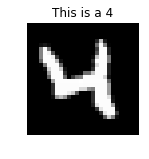

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (2,10)


def show_digit(img, caption='', subplot=None):
    if subplot==None:
        _,(subplot)=plt.subplots(1,1)
    imgr=img.reshape((28,28))
    subplot.axis('off')
    subplot.imshow(imgr, cmap='gray')
    plt.title(caption)
show_digit(train_set[0][20], 'This is a {}'.format(train_set[1][20]))

### Transform the Training Dataset and Upload It to S3

In [ ]:
%%time
from sagemaker.amazon.common import write_numpy_to_dense_tensor
import io
import boto3

data_key = ''
data_location = 's3://{}/mnist'.format(bucket, data_key)
buf = io.BytesIO()
write_numpy_to_dense_tensor(buf, train_set[0], train_set[1])
buf.seek(0)
boto3.resource('s3').Bucket(bucket).Object(data_key).upload_fileobj(buf)

### Train KMenas

In [ ]:
from sagemaker import KMeans

data_location = 's3://{}/mnist'.format(bucket)
output_location = 's3://{}/mnist/output'.format(bucket)
kmeans = KMeans(role=role,
                train_instance_count=2,
                train_instance_type='ml.t2.medium',
                output_path=output_location,
                k=10,
                data_location=data_location)
kmeans.fit(kmeans.record_set(train_set[0]))

### Validate the model

In [ ]:
result = kmeans_predictor.predict(valid_set[0][30:31])
print(result)